In [4]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

# all of the imports
import pickle 
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

import warnings
warnings.filterwarnings('ignore')

/Users/vicky/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/vicky/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
### sns.regplot(x,y, data =...)

In [123]:
finalmerged_clean = pd.read_csv('finalmerged_clean').drop('Unnamed: 0', axis=1).drop('Horse Name', axis =1).drop('Final_Time', axis=1)

In [124]:
finalmerged_clean.head(2)

,Final_Time_Hund,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
0,9511,1,0,6,1,0.333333,28,366.500000,490.000000,614.909091
1,9525,0,3,5,0,0.600000,35,386.666667,506.714286,622.666667


# Step 1: Model

### Regression with Statsmodel

##### Correlation

In [125]:
finalmerged_clean.corr()

,Final_Time_Hund,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
Final_Time_Hund,1.000000,-0.477153,-0.213051,-0.341384,-0.228002,-0.249711,-0.287789,0.211084,0.284837,0.377089
Firsts,-0.477153,1.000000,0.443852,0.740132,0.219490,0.296124,0.249456,0.123822,0.001280,-0.315735
Seconds,-0.213051,0.443852,1.000000,0.638232,0.320904,0.546351,0.303150,0.033778,-0.062114,-0.166501
Starts,-0.341384,0.740132,0.638232,1.000000,0.429232,0.143827,0.391028,0.029699,-0.079292,-0.336416
Thirds,-0.228002,0.219490,0.320904,0.429232,1.000000,0.440724,0.281954,-0.218859,-0.224672,-0.160383
PercentWin,-0.249711,0.296124,0.546351,0.143827,0.440724,1.000000,0.103121,-0.074982,-0.201334,-0.114561
Date,-0.287789,0.249456,0.303150,0.391028,0.281954,0.103121,1.000000,-0.019346,0.003547,-0.117295
ThreeF,0.211084,0.123822,0.033778,0.029699,-0.218859,-0.074982,-0.019346,1.000000,0.481989,0.393250
FourF,0.284837,0.001280,-0.062114,-0.079292,-0.224672,-0.201334,0.003547,0.481989,1.000000,0.458814
FiveF,0.377089,-0.315735,-0.166501,-0.336416,-0.160383,-0.114561,-0.117295,0.393250,0.458814,1.000000


##### Correlation map

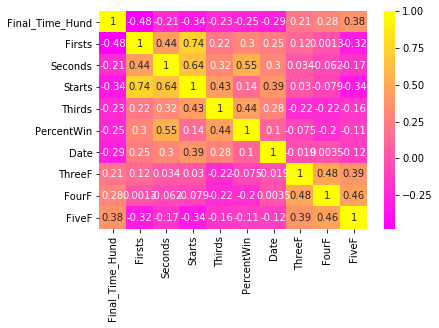

In [126]:
sns.heatmap(finalmerged_clean.corr(), cmap = 'spring' , annot = True)

##### Correlations plotted

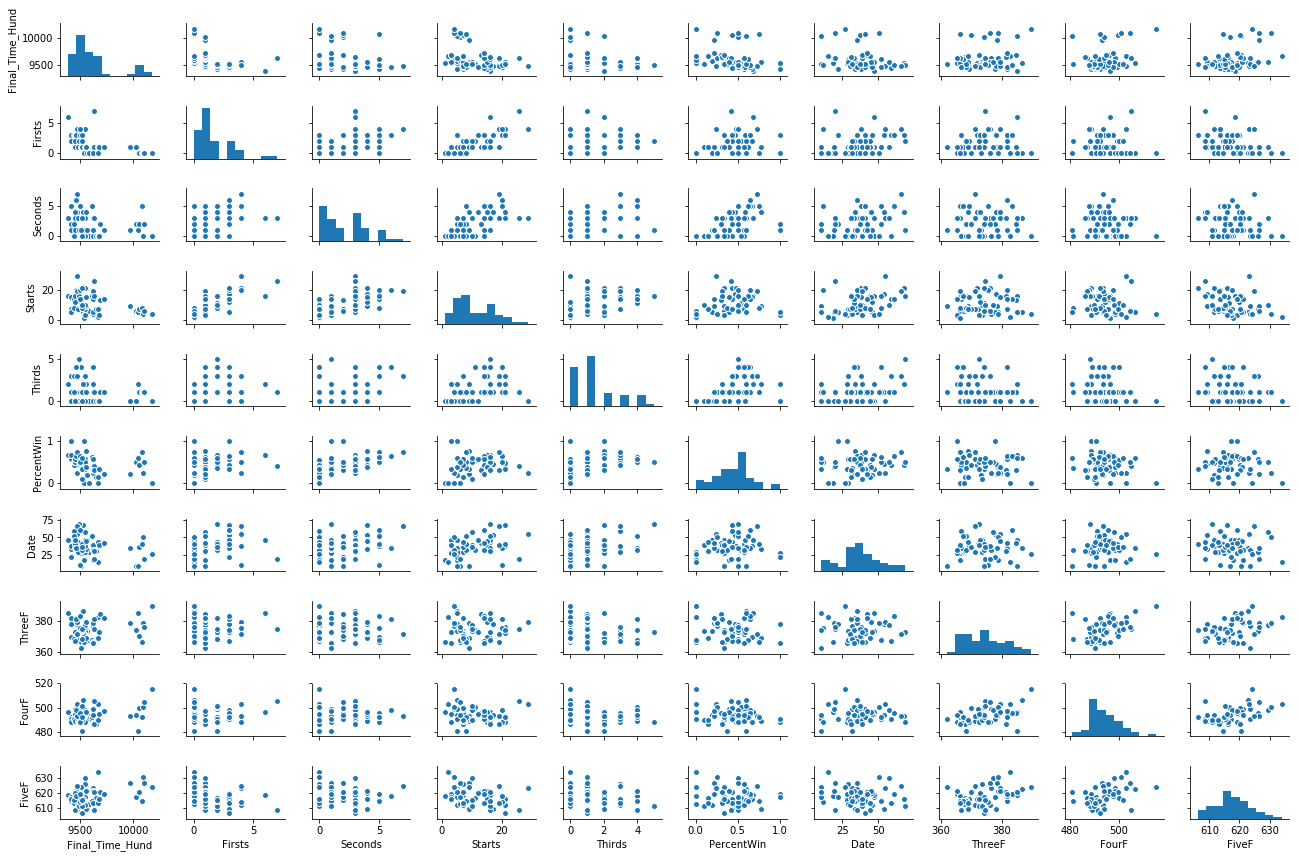

In [127]:
sns.pairplot(finalmerged_clean, size = 1.2, aspect=1.5)

##### Least sqaures regression
Least square regression works by making the total of the square of the errors as small as possible (that is why it is called "least squares").

In [128]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Final_Time_Hund ~ Date + PercentWin + Thirds + Seconds + Firsts + Starts + ThreeF + FourF + FiveF', data=finalmerged_clean, return_type="dataframe") 


In [129]:
# Create your model
model = sm.OLS(y,X)

In [130]:
# Fitting the model to the training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Final_Time_Hund   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     3.311
Date:                Mon, 23 Apr 2018   Prob (F-statistic):            0.00323
Time:                        17:30:55   Log-Likelihood:                -375.36
No. Observations:                  58   AIC:                             770.7
Df Residuals:                      48   BIC:                             791.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3111.3945   2715.519      1.146      0.258   -2348.522    8571.311
Date          -2.8864      1.758     -1.642      0.107      -6.421       0.648
PercentWin   -23.3898    179.517     -0.130      0.897    -384.332     337.553
Thirds        -7.0326     24.786     -0.284      0.778     -56.869      42.804
Seconds        1.6380     22.914      0.071      0.943     -44.433      47.709
Firsts       -72.9867     27.906     -2.615      0.012    -129.095     -16.879
Starts         6.4540      9.061      0.712      0.480     -11.764      24.671
ThreeF         4.0847      4.439      0.920      0.362      -4.841      13.010
FourF          5.7063      4.627      1.233      0.223      -3.597      15.009
FiveF          3.7549      4.943      0.760      0.451      -6.183      13.693
==============================================================================
Omnibus:                        9.118   Durbin-Watson:                   0.610
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.828
Skew:                           0.933   Prob(JB):                       0.0121
Kurtosis:                       3.413   Cond. No.                     1.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's try doing this again, removing the inputs with the largest p values (Seconds, Thirds and Starts) 

In [145]:
y, X = patsy.dmatrices('Final_Time_Hund ~ Date + Firsts + Starts + ThreeF + FourF + FiveF', data=finalmerged_clean, return_type="dataframe") 

In [146]:
model = sm.OLS(y,X)

In [147]:
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Final_Time_Hund   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     5.217
Date:                Mon, 23 Apr 2018   Prob (F-statistic):           0.000298
Time:                        17:37:12   Log-Likelihood:                -375.48
No. Observations:                  58   AIC:                             765.0
Df Residuals:                      51   BIC:                             779.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2939.1882   2582.968      1.138      0.260   -2246.336    8124.713
Date          -2.9857      1.688     -1.768      0.083      -6.375       0.404
Firsts       -73.9995     22.591     -3.276      0.002    -119.352     -28.646
Starts         6.2183      5.483      1.134      0.262      -4.789      17.226
ThreeF         4.4232      4.233      1.045      0.301      -4.075      12.922
FourF          6.1163      4.365      1.401      0.167      -2.648      14.880
FiveF          3.4876      4.760      0.733      0.467      -6.068      13.043
==============================================================================
Omnibus:                        8.855   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.525
Skew:                           0.918   Prob(JB):                       0.0141
Kurtosis:                       3.392   Cond. No.                     1.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Plotting Residuals
Let's take a quick look at a plot of our residuals (actual value - predicted value) with this model. We do this because in a good model we essentially want our errors to be random. If our residuals look systematic (e.g. missing high for one range and low for another) then we probably are missing the actual functional dependency underlying the data (perhaps it's not really linear).

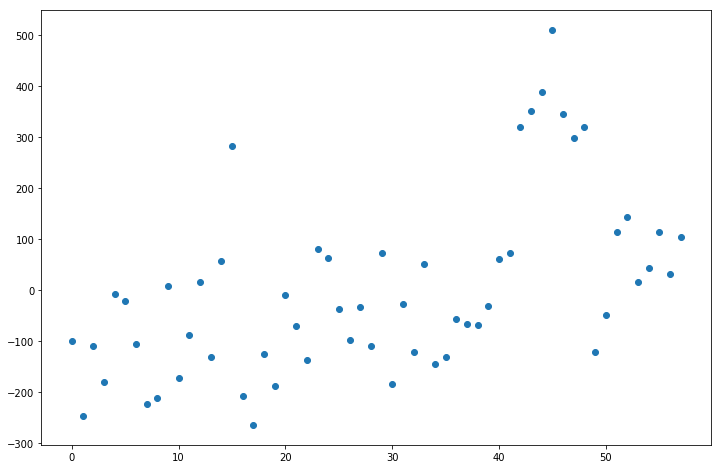

In [141]:
# Using statsmodels to plot the residuals
##This is pretty common for plotting how well your model is doing!
fit.resid.plot(style='o', figsize=(12,8));

### Regression with Sklearn

##### Getting to R^2

In [148]:
# Create an empty model
lr = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = finalmerged_clean.iloc[:,1:]
#Give me all the columns, and rows 1+ (so we don't hit the first row)
# Choose the response variable(s)
y = finalmerged_clean.iloc[:,0]
# Fit the model to the full dataset
lr.fit(X,y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.38305021966920283

Running the slightly better model than before

In [7]:
lr1 = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X3 + X6 model
X = finalmerged_clean.iloc[:,[1,3,7,8,9]]
# Choose the response variable(s)
y = finalmerged_clean.iloc[:,0]
# Fit the model to the full dataset
lr1.fit(X,y)
# Print out the R^2 for the model against the full dataset
lr1.score(X,y)

NameError: name 'finalmerged_clean' is not defined

Maybe we're interesting the the coefficient or the y-intercept. Sk learn makes us work for the raw values (not as clean and obvious like statsmodels). 

In [150]:
print(lr1.intercept_)
# print out other coefficients
lr1.coef_
#Coeficients for each variable

2954.758090896483


array([-71.61913555,   3.15014229,   4.79803521,   5.66288346,
         3.46594557])

In [57]:
#Pickleing pandas
finalmerged_clean.to_pickle('practice.pkl')

In [58]:
### WHY DO MY PICKELS SHOW AN ERROR??

In [59]:
#Pickleing stats model
# Pickle fit2 to a file 
fit.save('practice2.pkl')

In [60]:
#Pickleing sklearn
from sklearn.externals import joblib
joblib.dump(lr, 'practice3.pkl')

['practice3.pkl']

##### Polynomial Regression

In [151]:
# import PolynomialFeatures and make_pipeline for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Step 2 : Train Test

##### Option 1 :Train test split

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# Fit the model against the training data
#Training data X and y gathered from above. 

lr.fit(X_train, y_train)
# Evaluate the model against the testing data

lr.score(X_test, y_test)
#R^2

NameError: name 'X' is not defined

In [165]:
lr3 = LinearRegression()
lr3.fit(X, y)
lr3.score(X, y)

#Not totally sure what the outputs for these last two mean...?

0.34235359562321266

##### Option 2: K-test Split (cross validation)

In [6]:
# 10-fold cross-validation with our fake data
reg = LinearRegression()
meansquared = cross_val_score(reg, X, y, cv=3, scoring='mean_squared_error')
#rsquare = 


# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)

##reg = LinearRegression()
#scores = cross_val_score(reg, X_poly3, y, cv=10, scoring='mean_squared_error')
#scores = cross_val_score(reg, X_poly4, y, cv=10, scoring='mean_squared_error')

NameError: name 'X' is not defined

In [167]:
np.mean(-scores)
##We've run a controlled study, and this is how it can expect to perform on a test. 
##Mean squared error. Variance of the residuals. Take the square root for root mean squared error. 

59914.12146924797

In [168]:
np.std(-scores)

38014.90140751091

In [ ]:
# >>> print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#Accuracy: 0.98 (+/- 0.03)

## Model and Train Test - Regularized Regression

##### Lasso Regularization
Weren't sure what features to use... your model is way too complex, you want to 0 some out. 

In [169]:
X = finalmerged_clean.iloc[:,[1,3,7,8,9]]
y = finalmerged_clean.iloc[:,0]

In [171]:
from sklearn.linear_model import Lasso 
model = Lasso(1.0)
fit = model.fit(X,y)
fit.score(X,y)    

0.3423148091623639

##### Ridge Regularization
If you have colinearities. 

In [172]:
from sklearn.linear_model import Ridge 
model = Ridge(1.0)
fit = model.fit(X,y)
fit.score(X,y)

0.3423138509951621

##### Elastic Net

In [173]:
from sklearn.linear_model import ElasticNet 
model = ElasticNet(1.0, l1_ratio = 0.5) ##This alpha seems high. 
fit = model.fit(X,y)
fit.score(X,y)

0.32743024903630924

##### Ridge cross validation

In [174]:
from sklearn.linear_model import RidgeCV

In [175]:
rcv = RidgeCV(cv=10)

In [176]:
rcv.fit(X, y)
rcv.score(X_test, y_test)

0.30893705664979276